# Umpires Calls vs. Computer's Calls

On Thursday, October 17th, 2019 Zack Greinke pitched in a playoff game against the New York Yankees. With a runner on first base and 1 out in the bottom of the 5th, Greinke faced Judge in a pivotal moment. With his team up 3-1, Greinke needed to get out of the 5th but was given no help from the home plate umpire. With a 2-0 count Greinke pitched a beautiful...ball? What was designated a ball by the home plate umpire was so obviously and clearly a strike according to the PitchF/X system (the system that creates the strike zone and ball image on the television screen, and records the data that I will be working with here). This notebook looks to see how often the the human, home-plate umpire, diverged from what the computer system recorded. More on this can be read on my blog:

https://lucaskellydataportfolio.weebly.com/the-pick-off/zack-greinke-needs-a-robo-umpire

In [200]:
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
from numpy.random import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

%matplotlib inline

from termcolor import colored

In [14]:
PitchDF['pitchIdx'] = PitchDF['pitchIdx'].astype(int)

In [15]:
PitchDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 352 to 702
Data columns (total 14 columns):
pitchIdx     351 non-null int64
inning       351 non-null object
frame        351 non-null object
ab           351 non-null object
abIdx        351 non-null object
batter       351 non-null object
stand        351 non-null object
speed        351 non-null float64
pitchtype    351 non-null object
px           351 non-null float64
pz           351 non-null float64
szTop        351 non-null float64
szBottom     351 non-null float64
des          351 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 41.1+ KB


In [16]:
PitchDF.loc[(PitchDF['inning']=='5') & (PitchDF['batter']=='Aaron Judge')]


,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des
509,509,5,bottom,41,1,Aaron Judge,R,87.9,changeup,-0.59,1.18,4.18,2.05,Ball
510,510,5,bottom,41,2,Aaron Judge,R,86.9,changeup,-1.58,2.73,4.15,1.99,Ball
511,511,5,bottom,41,3,Aaron Judge,R,85.7,slider,-0.05,3.45,4.16,2.09,Ball
512,512,5,bottom,41,4,Aaron Judge,R,83.8,slider,0.11,2.17,4.18,1.96,Called Strike
513,513,5,bottom,41,5,Aaron Judge,R,87.4,changeup,-1.04,1.57,3.94,1.88,Swinging Strike
514,514,5,bottom,41,6,Aaron Judge,R,88.1,changeup,-0.84,2.37,3.94,1.88,Foul
515,515,5,bottom,41,7,Aaron Judge,R,84.8,slider,-0.40,2.88,3.94,1.88,Foul
516,516,5,bottom,41,8,Aaron Judge,R,85.4,slider,0.31,0.40,4.09,1.96,Ball In Dirt


In [19]:
PitchDF.to_csv('PitchDF.csv')

# Visualization

(-2, 2)

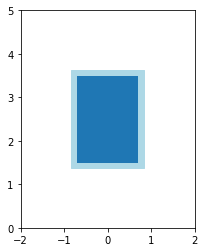

In [145]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect = 'equal')

platewidthInFeet = 17/12 # plate is 17 inches
expandedplateInFeet = 20/12 # adding 3 inch ball
sizeHeightInFeet = 3.5  - 1.5
ballInFeet = 3 / 12 # 
halfBallInFeet = ballInFeet / 2

# draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around
ax1.add_patch(patches.Rectangle((expandedplateInFeet/-2, 1.5 - halfBallInFeet), expandedplateInFeet, sizeHeightInFeet + ballInFeet, color='lightblue'))

# draw formal zone (plate only)
ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, 1.5), platewidthInFeet, sizeHeightInFeet))

plt.ylim(0, 5)
plt.xlim(-2, 2)

In [146]:
pitchColors = { "FA":"b", "FF":"red", "FT": "y", "FC": "k", "":"w", None: "violet",
                    "FS":"aqua", "SL":"orange", "CH":"h","CU":"green","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }

pitchMarkers = { "FA":"x", "FF":"o", "FT": "1", "FC": "2", "":"2", None: "4",
                    "FS":"aqua", "SL":"^", "CH":"h","CU":"o","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }

In [150]:
def draw_ab(df):
    stand = df['stand'].iloc[0]
    batter = df['batter'].iloc[0]
    inning = df['inning'].iloc[0]
    frame = df["frame"].iloc[0]
    suffix = "th"
    suffix = "st" if inning == '1' else suffix
    suffix = "nd" if inning == '2' else suffix
    suffix = "rd" if inning == '3' else suffix

    plt.figure(figsize=(7,7)) 

    platewidthInFeet = 17 / 12 # plate is 17 inches wide
    expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
    szTop = df["szTop"].iloc[0]
    szBottom = df["szBottom"].iloc[0]
    szHeightInFeet = szTop - szBottom
    # draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around

    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
    currentAxis.add_patch(Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet, facecolor="lightgrey"))
    if stand == 'R':
        standTextX = -1.5
    else:
        standTextX = 1.4
    tbatter = currentAxis.text(standTextX, 2.5, stand, style='italic', fontsize=24,
            bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

    pitchList = []
    availColors = ['b','r','y','k','w']
    pitchesUsed = df['pitchtype'].unique()
    abCount = len(df['speed'])
    markerSize = [0] * abCount
    for i, sx in enumerate(df['speed'].tolist()):
        markerSize[i] = int(sx -  70)*3
        thrownPitch = df['pitchtype'].tolist()[i]
        for j, (k, v) in enumerate(pitchDictionary.items()):
            if thrownPitch == v:
                pitchList.append(plt.scatter(df['px'].iloc[i], df['pz'].iloc[i], marker=pitchMarkers[k], 
                                             color='red', label=v, zorder=2))
                #print("i: {} j: {} pitch: {}, key: {}, value: {} marker: {} color:{}".format(i, j, thrownPitch, k, v, pitchMarkers[k], pitchColors[k]))

    print(markerSize, colors, pitchesUsed)

    # graph limits
    plt.ylim(0, 5)
    plt.xlim(-2.5, 2.5)
    plt.gca().set_aspect('equal', 'box')

    # draw legend by consolidating like pitch types
    handles, labels = plt.gca().get_legend_handles_labels()
    newLabels, newHandles = [], []
    for handle, label in zip(handles, labels):
        if label not in newLabels:
            newLabels.append(label)
            newHandles.append(handle)
    plt.legend(newHandles, newLabels)

    # axis labels
    plt.xlabel("Catcher's View - " + batter + " (" + str(frame) + " of the " + str(inning) + suffix + ")")
    plt.ylabel('vertical location')

    plt.show()

[51, 48, 45, 39, 51, 54, 42, 45] {'R': 'red', 'L': 'black'} ['changeup' 'slider']


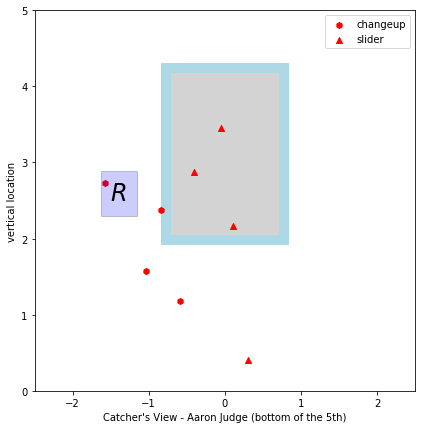

In [151]:
draw_ab(PitchDF.loc[PitchDF['ab']==41])

# Creating Computer Pitch Calls

What we have are calls designated by the umpire as well as PitchF/X data showing pitch location as px and pz. We also have the sz_top and sz_bottom for each individual batter as those variables change by batter height. So, if we create a strike zone, we can use PitchF/X data to determine whether or not the computer would have called the pitch a ball or a strike.

In [34]:
# Setting up the zone

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szTop = PitchDF["szTop"].iloc[0]
szBottom = PitchDF["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

# X Calls

One way to do this is to see if the ball was in the horizontal strike zone. If so, we will add a 'Strike' designation, if not, we will add an 'out' designation or a 'in' designation for inside or outside of the strike zone. 

In [166]:
def pitch_call_x(x):
    if x < (-(expandedPlateInFeet/2)):
        return 'Out'
    elif x > (expandedPlateInFeet/2):
        return 'In'
    else:
        return 'Strike'

In [167]:
x_call = []
px = list(PitchDF['px'])

for i in px:
    x_call.append(pitch_call_x(i))
    

In [168]:
x_call[10]

'Strike'

In [169]:
PitchDF['x_call'] = x_call

# Y calls

We have to now do the same thing with the vertical location of the ball. An added challenge here is that the strike zone height changes with each batter. So, we'll need to compare the pz (vertical location of the pitch) with each batter's sz_Top and sz_Bottom measurements.

In [172]:
# Create a Nan value for all y_calls, then fill only values where the pitch is higher than the 
# batter's strike zone height.

PitchDF['y_call'] = np.nan
PitchDF['y_call'] = np.where((PitchDF['pz'] > PitchDF['szTop'])
                     , PitchDF['y_call'], np.nan)

In [173]:
# If the pitch is higher than the zone top, we designate High
# If the pitch is lower than the zone bottom, we designate Low
# Other wise, it should be a Strike

conditions = [(PitchDF['pz'] > PitchDF['szTop']), (PitchDF['pz'] < PitchDF['szBottom'])]

choices = ['High', 'Low']

PitchDF['y_call'] = np.select(conditions, choices, default='Strike')

In [174]:
# Create empty column

PitchDF['comp_call'] = np.nan

In [175]:
# Now that we have the computer calls for the X and Y, we need to put them together. 
# If a call is a strike in the X and a strike in the Y, we have a strike called by the computer
# If any other coniditions exist, (X strike but Y ball), then we have a ball. 

conditions = [((PitchDF['x_call'] == 'Strike') & (PitchDF['y_call'] == 'Strike')), ((PitchDF['x_call'] != 'Strike') & (PitchDF['y_call'] != 'Strike'))]

choices = ['Called Strike', 'Ball']

PitchDF['comp_call'] = np.select(conditions, choices, default='Ball')

In [178]:
# Here it is! Calls can now be compared between the umpire('des') and the computer('comp_call')

PitchDF.head()

,Unnamed: 0,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des,x_call,y_call,comp_call
0,352,352,1,top,1,1,George Springer,R,91.8,4-seam fb,0.02,2.47,3.37,1.53,Foul,Strike,Strike,Called Strike
1,353,353,1,top,1,2,George Springer,R,89.4,fb-splitter,-1.37,3.08,3.62,1.72,Ball,Out,Strike,Ball
2,354,354,1,top,1,3,George Springer,R,83.3,slider,0.75,2.31,2.81,1.30,"In play, out(s)",Strike,Strike,Called Strike
3,355,355,1,top,2,1,Jose Altuve,R,82.8,slider,0.73,1.96,3.05,1.45,Called Strike,Strike,Strike,Called Strike
4,356,356,1,top,2,2,Jose Altuve,R,91.0,4-seam fb,-1.22,4.44,3.08,1.39,Ball,Out,High,Ball


# Investigating accuracy of the umpire

Now that we have the means to compare, we need to slice the DF to eliminate any opportunity where a call did not need to be made by the umpire. For example, if a foul ball is hit, the umpire doesn't need to call the pitch a ball or a strike.

In [179]:
# Create a DF that only looks at ball and strike calls

UmpComp = PitchDF.loc[(PitchDF['des']=='Ball') | (PitchDF['des']=='Called Strike')]

In [180]:
# Apply an accuracy measurement, a 1 if the des matches the comp_call and a 0 if they do not.

UmpComp['acc'] = np.where((UmpComp['des'] == UmpComp['comp_call']),1,0)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
# Number of ball/strike designations by the umpire

UmpComp.shape

(186, 19)

In [186]:
# Number of times the umpire was wrong compared to the computer

UmpComp.loc[UmpComp['acc']==0].shape

(19, 19)

In [187]:
# Number of times the umpire was right according to the umpire

UmpComp.loc[UmpComp['acc']==1].shape

(167, 19)

In [194]:
# This means that 19 out of the 

print('The Umpire was wrong ' + str(np.round(19/186, 2)*100) + '% of the time.')
print('The Umpire was right ' + str(np.round(167/186, 2)*100) + '% of the time.')

The Umpire was wrong 10.0% of the time.
The Umpire was right 90.0% of the time.


# Looking at Greinke

Now, let's look at how the umpire called only Greinke. 

In [196]:
# Greinke pitched through batter number 41, Aaron Judge, in the bottom of the 5th inning. 

UmpComp_Greinke = UmpComp.loc[0:161]
UmpComp_Greinke.tail()

,Unnamed: 0,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des,x_call,y_call,comp_call,acc
155,507,507,5,bottom,40,3,DJ LeMahieu,R,89.0,4-seam fb,-1.74,3.37,3.53,1.81,Ball,Out,Strike,Ball,1
157,509,509,5,bottom,41,1,Aaron Judge,R,87.9,changeup,-0.59,1.18,4.18,2.05,Ball,Strike,Low,Ball,1
158,510,510,5,bottom,41,2,Aaron Judge,R,86.9,changeup,-1.58,2.73,4.15,1.99,Ball,Out,Strike,Ball,1
159,511,511,5,bottom,41,3,Aaron Judge,R,85.7,slider,-0.05,3.45,4.16,2.09,Ball,Strike,Strike,Called Strike,0
160,512,512,5,bottom,41,4,Aaron Judge,R,83.8,slider,0.11,2.17,4.18,1.96,Called Strike,Strike,Strike,Called Strike,1


In [197]:
# Let's make a confusion matrix

from sklearn.metrics import confusion_matrix
y_true = UmpComp_Greinke['des'] 
y_pred = UmpComp_Greinke['comp_call']

In [198]:
import itertools
import matplotlib.pyplot as plt

# Function to visualize confusion matrix

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Umpire vs. Computer - Confusion Matrix")
    plt.ylabel('Umpire')
    plt.xlabel('Computer')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

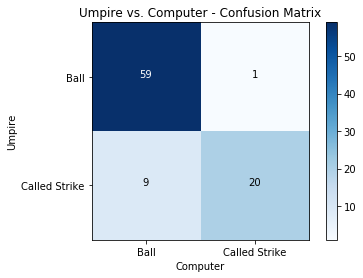

In [199]:
show_cf(y_true, y_pred)

In [120]:
# Sanity check to be sure we're using the right data
# Greinke is recorded as having pitched 83 pitches according to:
# https://www.mlb.com/gameday/astros-vs-yankees/2019/10/17/599360#game_state=final,lock_state=final,game_tab=box,game=599360


In [124]:
# spliced df showing all of Greinke's pitches

test.head()

,Unnamed: 0,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des,x_call,y_call,comp_call
18,370,370,1,bottom,5,1,DJ LeMahieu,R,88.6,4-seam fb,1.03,2.25,3.53,1.75,Ball,In,Strike,Ball
19,371,371,1,bottom,5,2,DJ LeMahieu,R,88.9,4-seam fb,0.69,1.46,3.50,1.75,Ball,Strike,Low,Ball
20,372,372,1,bottom,5,3,DJ LeMahieu,R,88.2,4-seam fb,0.28,1.19,3.50,1.69,Ball,Strike,Low,Ball
21,373,373,1,bottom,5,4,DJ LeMahieu,R,87.6,4-seam fb,1.44,1.91,3.53,1.75,Ball,In,Strike,Ball
22,374,374,1,bottom,6,1,Aaron Judge,R,90.2,4-seam fb,-0.08,1.27,4.24,2.08,Ball,Strike,Low,Ball


In [125]:
# Shape shows 83 individual pitches

test.shape

(83, 18)

In [173]:
# References

# https://www.bu.edu/articles/2019/mlb-umpires-strike-zone-accuracy


# The Yankees Pitcher Starting Pitcher - Mashahiro Tanaka

Now, let's apply the same methods to find out how the umpire called Tanaka. First, we will splice the data to show only Tanaka's pitches, he pitched 85 pitches through the 5th inning and 1 batter into the 6th. Remember, we then splice that data to only show called balls and strikes. Again, we are removing anything else (balls in play, foul balls, etc.,)

In [143]:
# Sanity checking Tanaka's pitch count

Tanaka_Pitches = PitchDF.loc[(PitchDF['frame']=='top') & (PitchDF['ab']<46)]
Tanaka_Pitches.shape

# Pitch count accurate

(85, 18)

In [95]:
Tanaka = UmpComp.loc[(UmpComp['frame']=='top')]

In [96]:
Tanaka = Tanaka.loc[Tanaka['inning']<6]

In [100]:
Tanaka.head()

,Unnamed: 0,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des,x_call,y_call,comp_call,acc
1,353,353,1,top,1,2,George Springer,R,89.4,fb-splitter,-1.37,3.08,3.62,1.72,Ball,Out,Strike,Ball,1
3,355,355,1,top,2,1,Jose Altuve,R,82.8,slider,0.73,1.96,3.05,1.45,Called Strike,Strike,Strike,Called Strike,1
4,356,356,1,top,2,2,Jose Altuve,R,91.0,4-seam fb,-1.22,4.44,3.08,1.39,Ball,Out,High,Ball,1
5,357,357,1,top,2,3,Jose Altuve,R,83.8,slider,1.27,0.70,3.05,1.48,Ball,In,Low,Ball,1
8,360,360,1,top,3,1,Michael Brantley,L,81.0,slider,-0.32,1.76,3.32,1.52,Called Strike,Strike,Strike,Called Strike,1


In [98]:
y_true2 = Tanaka['des'] 
y_pred2 = Tanaka['comp_call']

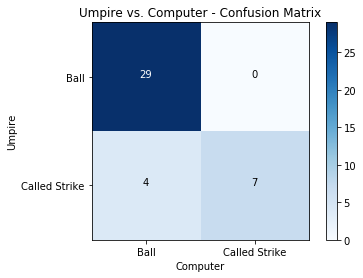

In [99]:
show_cf(y_true2, y_pred2)